# Übung 10.3

Aus seismischen Beobachtungen kann man auf die seismischen Geschwindigkeiten und die Dichte rückschließen. Diese Übung soll unter anderem veranschaulichen, dass man aus diesen Daten schon einiges über den Aufbau der Erde lernen kann.

In [8]:
import numpy as np

tiefe  = np.array([100, 1000, 4000, 6371])      # Tiefe in km
dichte = np.array([3.38, 4.58, 11.32, 13.09])   # Dichte in 1000 kg/m^3
p_wave = np.array([8.05, 11.46, 9.51, 11.26])   # Geschwindigkeit in km/s
s_wave = np.array([4.45, 6.38, 0, 3.67])        # Geschwindigkeit in km/s

Zuerst muss man alles in SI Einheiten umwandeln, sonst wird es verwirrend! SI Einheiten sind eine Konvention, eine Grösse immer in derselben Einheit anzugeben. Längen schreibt man zum Beispiel in $m$ (Meter), Flächen in $m^2$, Geschwindigkeit in $m/s$ (Meter pro Sekunde), oder Dichte in $kg/m^3$ (Kilogramm pro Kubikmeter). 

In [9]:
tiefe_SI  = tiefe * 1000  # in m
dichte_SI = dichte * 1000 # in kg/m^3
p_wave_SI = p_wave * 1000 # in m/s
s_wave_SI = s_wave * 1000 # in m/s

Jetzt können wir das Schermodul und das Kompressionsmodul berechnen. Dazu müssen wir einfach die gegebenen Formeln umstellen.
Die S-Wellen Geschwindigkeit $\beta$ können wir schreiben als ...
$$\beta = \sqrt{\frac{\mu}{\rho}} \Leftrightarrow \mu = \rho \beta^2$$
Die P-Wellen Geschwindigkeit $\alpha$ können wir schreiben als ...
$$\alpha = \sqrt{\frac{K+4/3\mu}{\rho}} \Leftrightarrow K = \rho \alpha^2 - 4/3 \mu$$
Beachte, dass wir in der Formel für $K$ $\mu$ drinhaben, also müssen wir $\mu$ entweder als Formel oder Zahl einsetzen. Mit diesen Formeln können wir beides nun ausrechnen. 



In [10]:
mu = s_wave_SI**2 * dichte_SI
K  = dichte_SI * p_wave_SI**2 - 4/3 * mu  # In Python schreibt man x^y als x**y  

### Plotten  

In [11]:
import matplotlib.pyplot as plt
def plot():
    plt.scatter(K, tiefe, label='Kompressionsmodul $K$')
    plt.scatter(mu, tiefe, label='Schermodul $\mu$')
    
    # Add horizontal lines
    plt.axhline(y=660, color='red', linestyle='--')
    plt.axhline(y=2900, color='orange', linestyle='--')
    plt.axhline(y=5100, color='yellow', linestyle='--')
    
    plt.text(1.4e12, 600, 'Oberer Mantel', color='black', fontsize=10, verticalalignment='bottom', horizontalalignment = "right")  # Above the 5100 line
    plt.text(1.4e12, 700, 'Unterer Mantel', color='black', fontsize=10, verticalalignment='top', horizontalalignment = "right")   # Below the 5100 line
    
    plt.text(1.4e12, 5050, 'Äusserer Kern', color='black', fontsize=10, verticalalignment='bottom', horizontalalignment = "right")  # Above the 5100 line
    plt.text(1.4e12, 5150, 'Innerer Kern', color='black', fontsize=10, verticalalignment='top', horizontalalignment = "right")   # Below the 5100 line
    
    
    plt.ylabel('Tiefe [km]')
    plt.gca().invert_yaxis()
    plt.legend()
    
    plt.show()
    

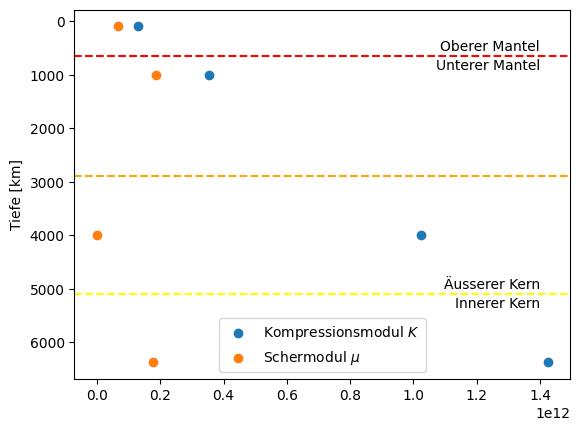

In [12]:
plot()

Mit den seismischen Wellengeschwindigkeiten können wir den Aufbau der Erde besser verstehen. In flüssigem Material gibt es keine Scherkräfte. Wenn wir herausfinden, dass die Schwewellengeschwindigkeit (beta) in einem Bereich der Erde 0 ist, dann muss der Bereich also flüssig sein. Genau das finden wir beim äusseren Erdkern.

An dem grösser werdenden Kompressionsmodul kann man erkennen, dass man immer mehr
Kraft aufwenden muss um das Volumen zu verändern (da alles bereits unter großem Druck steht).